In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [3]:
df1 = myfile
df1 = df1 %>% group_by(donor_id, pool_id) %>% summarise(sum_all = sum(n_cells))
nrow(df1)
head(df1)

[1] 232

donor_id,pool_id,sum_all
HPSI0114i-bezi_3,pool10,393
HPSI0114i-eipl_1,pool1,25935
HPSI0114i-fikt_3,pool14,283
HPSI0114i-kolf_2,pool10,243
HPSI0114i-kolf_2,pool15,2423
HPSI0114i-lexy_2,pool10,453


In [4]:
df2 = myfile[myfile$celltype %in% c("DA","Sert"),]
df2 = df2 %>% group_by(donor_id, pool_id) %>% summarise(sum_midbrain = sum(n_cells))
nrow(df2)
head(df2)

[1] 230

donor_id,pool_id,sum_midbrain
HPSI0114i-bezi_3,pool10,229
HPSI0114i-eipl_1,pool1,334
HPSI0114i-fikt_3,pool14,114
HPSI0114i-kolf_2,pool10,122
HPSI0114i-kolf_2,pool15,1064
HPSI0114i-lexy_2,pool10,359


In [5]:
df = inner_join(df1,df2)
nrow(df)
head(df)

Joining, by = c("donor_id", "pool_id")


[1] 230

donor_id,pool_id,sum_all,sum_midbrain
HPSI0114i-bezi_3,pool10,393,229
HPSI0114i-eipl_1,pool1,25935,334
HPSI0114i-fikt_3,pool14,283,114
HPSI0114i-kolf_2,pool10,243,122
HPSI0114i-kolf_2,pool15,2423,1064
HPSI0114i-lexy_2,pool10,453,359


In [6]:
df$diff_eff = df$sum_midbrain/df$sum_all
head(df)

donor_id,pool_id,sum_all,sum_midbrain,diff_eff
HPSI0114i-bezi_3,pool10,393,229,0.58269720
HPSI0114i-eipl_1,pool1,25935,334,0.01287835
HPSI0114i-fikt_3,pool14,283,114,0.40282686
HPSI0114i-kolf_2,pool10,243,122,0.50205761
HPSI0114i-kolf_2,pool15,2423,1064,0.43912505
HPSI0114i-lexy_2,pool10,453,359,0.79249448


In [7]:
length(unique(df$donor_id))

[1] 197

In [25]:
df$replicate = "no_rep"
for (donor in unique(df$donor_id)){
    r = df[df$donor_id == donor,]
    if (nrow(r)>1){
        df$replicate[df$donor_id == donor][1] = 'rep1'
        df$replicate[df$donor_id == donor][2] = 'rep2'
    }
}
head(df)

donor_id,pool_id,sum_all,sum_midbrain,diff_eff,replicate
HPSI0114i-bezi_3,pool10,393,229,0.58269720,no_rep
HPSI0114i-eipl_1,pool1,25935,334,0.01287835,no_rep
HPSI0114i-fikt_3,pool14,283,114,0.40282686,no_rep
HPSI0114i-kolf_2,pool10,243,122,0.50205761,rep1
HPSI0114i-kolf_2,pool15,2423,1064,0.43912505,rep2
HPSI0114i-lexy_2,pool10,453,359,0.79249448,rep1


In [26]:
df_r = data.frame()

for (donor in unique(df$donor_id)){
    r = df[df$donor_id == donor,]
    if (nrow(r)>1){
        df_r = rbind(df_r, data.frame(donor = donor, 
                          de1 = r[r$replicate == "rep1","diff_eff"],
                          de2 = r[r$replicate == "rep2","diff_eff"]))
    }
}

In [28]:
nrow(df_r)
head(df_r)

[1] 32

donor,diff_eff,diff_eff.1
HPSI0114i-kolf_2,0.5020576,0.4391251
HPSI0114i-lexy_2,0.7924945,0.6613162
HPSI0114i-wegi_1,0.9086982,0.8864971
HPSI0115i-hecn_6,0.3046837,0.3798587
HPSI0115i-jotn_2,0.3647376,0.3585919
HPSI0115i-qecv_2,0.3819444,0.5714286


In [29]:
cor(df_r$diff_eff, df_r$diff_eff.1)
cor.test(df_r$diff_eff, df_r$diff_eff.1)

[1] 0.7400306


	Pearson's product-moment correlation

data:  df_r$diff_eff and df_r$diff_eff.1
t = 6.0266, df = 30, p-value = 1.294e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5274393 0.8654104
sample estimates:
      cor 
0.7400306 


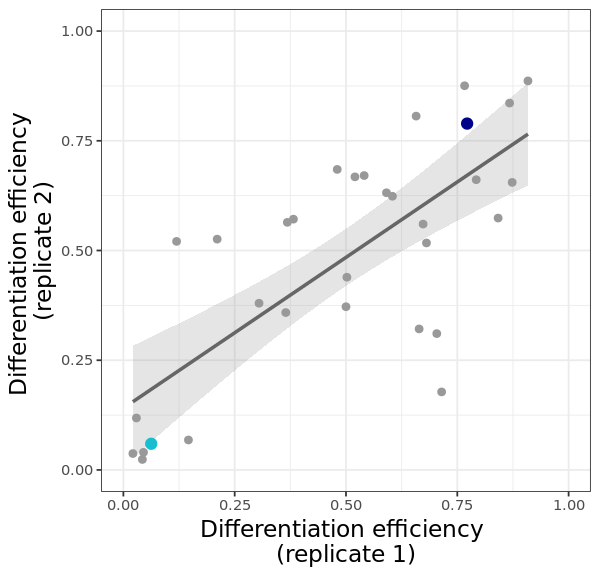

In [30]:
options(repr.plot.width=5, repr.plot.height=4.8)
ggplot(df_r, aes(x=diff_eff,y=diff_eff.1)) + geom_point(size = 1.8, col ='grey60') + stat_smooth(method = "lm", col = "grey40", alpha = "0.25") +
    xlab("Differentiation efficiency \n(replicate 1)") + ylab("Differentiation efficiency \n(replicate 2)") + 
    xlim(c(0,1)) + ylim(c(0,1))+
    geom_point(data = df_r[df_r$donor == "HPSI0514i-fiaj_1",], col = "#17becf", size = 2.8) +
    geom_point(data = df_r[df_r$donor == "HPSI1213i-hehd_1",], col = "darkblue", size = 2.8) + 
    theme_bw() + theme(axis.title = element_text(size = 14))